In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Import inspector to see the columns in the tables
from sqlalchemy import inspect

In [10]:
inspector = inspect(engine)


In [11]:
columns_meas = inspector.get_columns('measurement')
for c in columns_meas:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

most_recent

('2017-08-23',)

Text(0, 0.5, 'Inches')

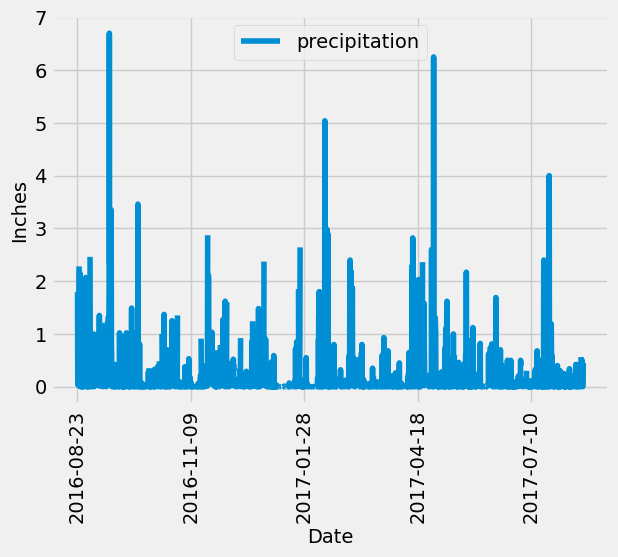

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# The most recent point in the database is 2017-08-23, as found in the cell above.

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
#year_ago

# Perform a query to retrieve the data and precipitation scores
columns = (Measurement.date, Measurement.prcp)
scores_data = session.query(*columns).filter(Measurement.date >= year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores_data_df = pd.DataFrame(scores_data, columns=["date", "precipitation"])
scores_data_df.set_index('date', inplace=True)
scores_data_df

# Sort the dataframe by date
scores_data_df = scores_data_df.sort_values(["date"])
scores_data_df

# Use Pandas Plotting with Matplotlib to plot the data
scores_data_df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
scores_data_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
#session.query(Station.station).count()
total_stations = session.query(func.count(Station.id)).all()
total_stations

[(9,)]

In [51]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
tob = session.query(Measurement.tobs)
for t in tob:
    print(t)

(65.0,)
(63.0,)
(74.0,)
(76.0,)
(73.0,)
(70.0,)
(64.0,)
(68.0,)
(73.0,)
(64.0,)
(61.0,)
(66.0,)
(65.0,)
(68.0,)
(64.0,)
(72.0,)
(66.0,)
(66.0,)
(69.0,)
(67.0,)
(67.0,)
(71.0,)
(67.0,)
(76.0,)
(68.0,)
(72.0,)
(70.0,)
(67.0,)
(66.0,)
(67.0,)
(69.0,)
(67.0,)
(67.0,)
(64.0,)
(69.0,)
(73.0,)
(73.0,)
(69.0,)
(69.0,)
(69.0,)
(71.0,)
(61.0,)
(69.0,)
(63.0,)
(64.0,)
(65.0,)
(67.0,)
(68.0,)
(65.0,)
(76.0,)
(75.0,)
(66.0,)
(70.0,)
(72.0,)
(73.0,)
(70.0,)
(71.0,)
(72.0,)
(72.0,)
(69.0,)
(70.0,)
(73.0,)
(72.0,)
(73.0,)
(70.0,)
(71.0,)
(68.0,)
(70.0,)
(72.0,)
(69.0,)
(68.0,)
(74.0,)
(72.0,)
(72.0,)
(73.0,)
(74.0,)
(73.0,)
(73.0,)
(74.0,)
(74.0,)
(74.0,)
(71.0,)
(72.0,)
(75.0,)
(75.0,)
(75.0,)
(75.0,)
(73.0,)
(73.0,)
(71.0,)
(71.0,)
(68.0,)
(70.0,)
(71.0,)
(74.0,)
(71.0,)
(75.0,)
(76.0,)
(75.0,)
(75.0,)
(76.0,)
(76.0,)
(76.0,)
(77.0,)
(77.0,)
(73.0,)
(74.0,)
(76.0,)
(76.0,)
(80.0,)
(74.0,)
(77.0,)
(77.0,)
(76.0,)
(77.0,)
(78.0,)
(78.0,)
(75.0,)
(73.0,)
(77.0,)
(76.0,)
(77.0,)
(77.0,)
(78.0,)
(75.0,)


In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

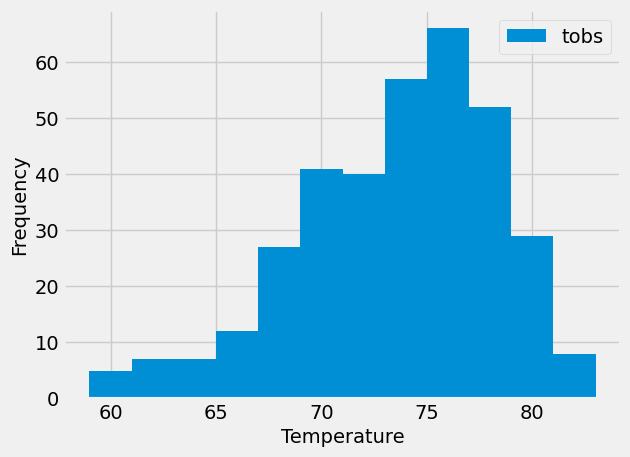

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_months = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00519281").\
filter(Measurement.date>year_ago).all()
last_year_months
last_year_months_df = pd.DataFrame(last_year_months)
last_year_months_df
last_year_months_df.plot(kind="hist", bins=12)
plt.xlabel("Temperature")

# Close Session

In [74]:
# Close Session
session.close()